## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import silhouette_score

In [2]:
# -- ВАШ КОД ТУТ --

with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
data_clustering
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

#обучение модели
kmeans = KMeans(n_clusters = 4).fit(X)

#метрика качества
silhouette_score(X, kmeans.labels_)


0.4433754926522356


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [3]:
# -- ВАШ КОД ТУТ --
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(Y,kmeans.labels_ )
#метрика силуэта хуже, чем AMI

0.5835423055834895


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [35]:
# -- ВАШ КОД ТУТ --
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv("7.10_clustering_hw.csv")

metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters = cluster_num, random_state = 99).fit(data.iloc[::,[0,1]])
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
        data.iloc[::,[0,1]][labels==centroid_label],
        centroids[centroid_label, :].reshape(1,-1)).sum(axis = 0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.897378110108
cluster_num 2, metric 663.5712032768098
cluster_num 3, metric 374.6589714184063
cluster_num 4, metric 348.17052724059613
cluster_num 5, metric 323.0909288942993
cluster_num 6, metric 300.10388486033395


best cluster num: 3


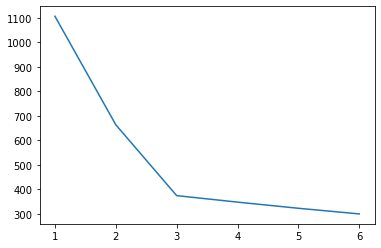

In [34]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D) + 1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

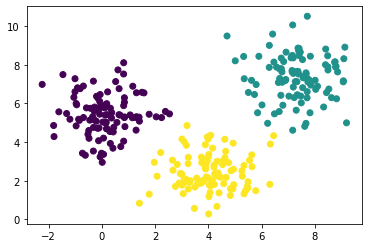

In [48]:
kmeans = KMeans(n_clusters = 3, random_state = 99).fit(data.iloc[::,[0,1]])
plt.scatter(data.iloc[::,0], data.iloc[::,1], c = kmeans.labels_)
plt.show()

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)